# Imported Libraries

In [1]:
import numpy as numpy                             #Importing the numerical python (numpy) library
import pandas as pd                               #Importing pandas libraries for analysing and manipulating data
import seaborn as sn                              #for plotting the heatmap of the weather variables
import matplotlib.pyplot as plt                   #for plotting various graphs such as scatter plot
import seaborn as sns                             #for plotting the heatmap of the weather variables
%matplotlib inline               
sns.set_theme(style = "darkgrid")                 #setting the background for any plot in program
plt.rcParams["figure.figsize"] = (15, 10)         #Creating a default size for graph or plot
import warnings                                   #Import warning library to help ignore warnings                   
warnings.filterwarnings('ignore')                 #Ignore warnings
import datetime as dt                             #Import datetime library for dates differences in data
from sklearn.linear_model import LinearRegression #Sklearn library for performing linear regression
from scipy.stats import linregress                #Scipy library for creating regression model
import statsmodels.api as sm                      #Statsmodels library for performing statistical operation
from datetime import datetime                     #Import datetime library for dates differences in data 


# Question 1 (Linear Interpolation)

In [2]:
#Load the Historical weather Data into a dataframe

weatherData = pd.read_csv("Paris_weather_data_2017.csv")  #Reading the csv file from the directory in local machine

weatherDataRenamed = weatherData.rename({'high Temp.�(�C)' : 'highTemp',  'avg Temp.�(�C)' : 'avgTemp', 'low Temp.�(�C)' : 'lowTemp', 'high Dew Point�(�C)' : 'highDewPoint', 'avg Dew Point�(�C)' : 'avgDewPoint', 'low Dew Point�(�C)' : 'lowDewPoint', 'high Humidity�(%)' : 'highHumidity', 'avg Humidity�(%)' : 'avgHumidity', 'low Humidity�(%)' : 'lowHumidity', 'high Sea Level Press.�(hPa)' : 'highSeaLevelPress', 'avg Sea Level Press.�(hPa)' : 'avgSeaLevelPress', 'low Sea Level Press.�(hPa)' : 'lowSeaLevelPress', 'high Visibility�(km)' : 'highVisibility', 'avg Visibility�(km)' : 'avgVisibility', 'low Visibility�(km)' :'lowVisibility',  'high Wind�(km/h)' : 'highWind', 'avg Wind�(km/h)' : 'avgWind', 'high Gust Wind�(km/h)' : 'highGustWind', 'sum Precip.�(mm)' : 'sumPrecip'}, axis=1) #Renaming the headers of the data file

weatherDataDroppedCols = weatherDataRenamed.drop(['highGustWind', 'Events'], axis=1) #Dropping unneeded columns

weatherDataInterpolate = weatherDataDroppedCols.interpolate(method='linear') #Performing Linear Interpolation on the data to filling missing data

weatherDataInterpolate  #Printng the new dataframe after performing renaming and interpolation



,Date,highTemp,avgTemp,lowTemp,highDewPoint,avgDewPoint,lowDewPoint,highHumidity,avgHumidity,lowHumidity,highSeaLevelPress,avgSeaLevelPress,lowSeaLevelPress,highVisibility,avgVisibility,lowVisibility,highWind,avgWind,sumPrecip
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,1/5/2017,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,12/30/2017,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


# Questions 2 (Correlation Matrix)

In [3]:
#Create the correlation matrix for all the weather variables

WeatherCorrMatrix = weatherDataInterpolate.corr()  #Calculate the correlation on the dataframe

WeatherCorrMatrix #Printing the correlation dataframe

,highTemp,avgTemp,lowTemp,highDewPoint,avgDewPoint,lowDewPoint,highHumidity,avgHumidity,lowHumidity,highSeaLevelPress,avgSeaLevelPress,lowSeaLevelPress,highVisibility,avgVisibility,lowVisibility,highWind,avgWind,sumPrecip
highTemp,1.000000,0.976658,0.888110,0.856099,0.858129,0.843248,-0.394430,-0.642644,-0.653028,-0.253617,-0.150903,-0.088462,0.472632,0.583418,0.433610,-0.081673,-0.199951,-0.059089
avgTemp,0.976658,1.000000,0.962072,0.913373,0.921361,0.909771,-0.378330,-0.562269,-0.553089,-0.308957,-0.203274,-0.135283,0.470747,0.516090,0.382910,-0.020533,-0.118921,-0.009994
lowTemp,0.888110,0.962072,1.000000,0.929764,0.944682,0.938312,-0.333137,-0.424648,-0.389762,-0.365482,-0.261217,-0.190036,0.440356,0.396212,0.294317,0.054929,-0.007974,0.052513
highDewPoint,0.856099,0.913373,0.929764,1.000000,0.978604,0.940691,-0.087426,-0.233558,-0.262292,-0.355841,-0.264679,-0.192708,0.423909,0.284302,0.137303,0.019975,-0.096624,0.132642
avgDewPoint,0.858129,0.921361,0.944682,0.978604,1.000000,0.979591,-0.094926,-0.214550,-0.231225,-0.329256,-0.229100,-0.158419,0.391113,0.275633,0.141021,-0.028561,-0.120984,0.108504
lowDewPoint,0.843248,0.909771,0.938312,0.940691,0.979591,1.000000,-0.111733,-0.218440,-0.221393,-0.303539,-0.199631,-0.133562,0.370891,0.283601,0.157779,-0.067316,-0.138766,0.073233
highHumidity,-0.394430,-0.378330,-0.333137,-0.087426,-0.094926,-0.111733,1.000000,0.784955,0.564862,0.060913,0.018209,0.005438,-0.197160,-0.537656,-0.650603,-0.104845,-0.162285,0.216222
avgHumidity,-0.642644,-0.562269,-0.424648,-0.233558,-0.214550,-0.218440,0.784955,1.000000,0.913106,0.088453,0.034150,0.014301,-0.393915,-0.751189,-0.705064,-0.035586,0.009024,0.263498
lowHumidity,-0.653028,-0.553089,-0.389762,-0.262292,-0.231225,-0.221393,0.564862,0.913106,1.000000,0.125158,0.069619,0.041238,-0.470039,-0.713792,-0.608081,-0.002123,0.081944,0.203391
highSeaLevelPress,-0.253617,-0.308957,-0.365482,-0.355841,-0.329256,-0.303539,0.060913,0.088453,0.125158,1.000000,0.964592,0.899322,-0.420369,-0.160598,-0.091900,-0.485558,-0.371158,-0.359849


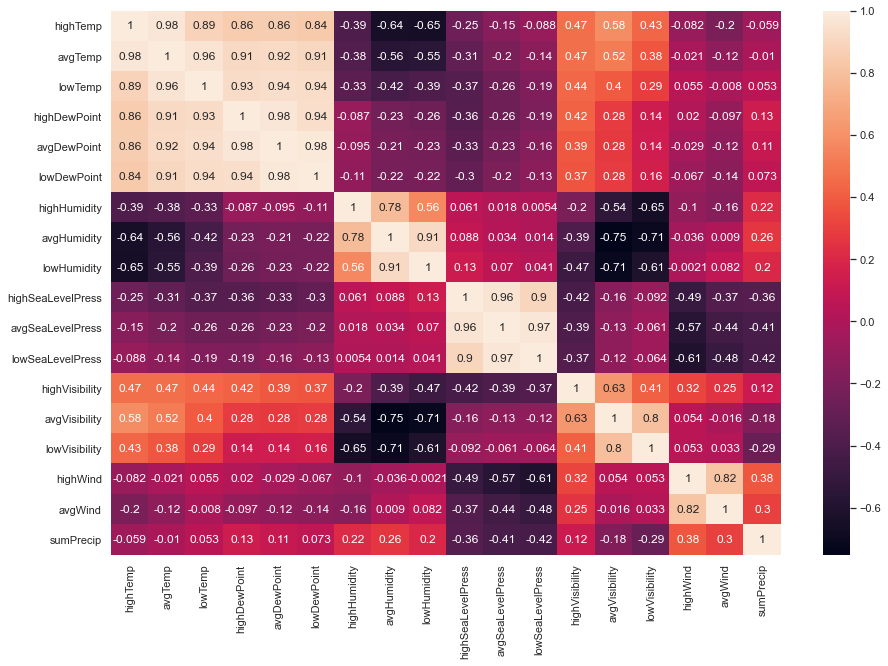

In [4]:
#Plotting the heatmap graph for the weather variable

sn.heatmap(WeatherCorrMatrix, annot=True) #computing the correlation using heatmap for visualisation

plt.show() #shows the correlation using heatmap graph

# Question 3 (Historical Daily Electricity Data)

In [5]:
#Load Data the historical energy consumption daily data

historicalData = pd.read_excel('Historique_consommation_JOUR_2017.xls', skiprows=16, usecols="D:F", header=1) # Loading the historical energy consumption data into a dataframe

historicalDataWithOutNan = historicalData.dropna() #drop columns with Nan values

historicalDataWithOutNan #Show the data loaded after cleaning


,Date,Type de données,Energie journalière (MWh)
1,01/01/2017,Définitives,1652084.0
2,02/01/2017,Définitives,1768332.0
3,03/01/2017,Définitives,1886120.0
4,04/01/2017,Définitives,1923775.0
5,05/01/2017,Définitives,1887470.0
...,...,...,...
372,27/12/2017,Définitives,1582970.0
373,28/12/2017,Définitives,1664743.0
374,29/12/2017,Définitives,1668623.0
375,30/12/2017,Définitives,1437082.0


# Question 4 (Synchronise Data)

In [6]:
#Synchronise weather and energy data on date
historicalDataWithOutNan['Date'] = pd.to_datetime(historicalDataWithOutNan['Date'], dayfirst=True) #Change the date to Datetime in historical energy consumption Dataframe

historicalDataWithSetIndex = historicalDataWithOutNan.set_index("Date") #Set historical energy consumption DataFrame index to date

weatherDataInterpolate['Date'] = pd.to_datetime(weatherDataInterpolate['Date']) #Change the date to Datetime in weather Dataframe

weatherDataWithSetIndex = weatherDataInterpolate.set_index("Date")#Set weather Dataframe index to date

mergeDatasets = pd.merge(weatherDataWithSetIndex, historicalDataWithSetIndex, on="Date") #Merge the two dataset on date

mergeDatasets #Shows the datasets

,highTemp,avgTemp,lowTemp,highDewPoint,avgDewPoint,lowDewPoint,highHumidity,avgHumidity,lowHumidity,highSeaLevelPress,avgSeaLevelPress,lowSeaLevelPress,highVisibility,avgVisibility,lowVisibility,highWind,avgWind,sumPrecip,Type de données,Energie journalière (MWh)
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0,Définitives,1652084.0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2,Définitives,1768332.0
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0,Définitives,1886120.0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2,Définitives,1923775.0
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0,Définitives,1887470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4,Définitives,1582970.0
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0,Définitives,1664743.0
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12,Définitives,1668623.0


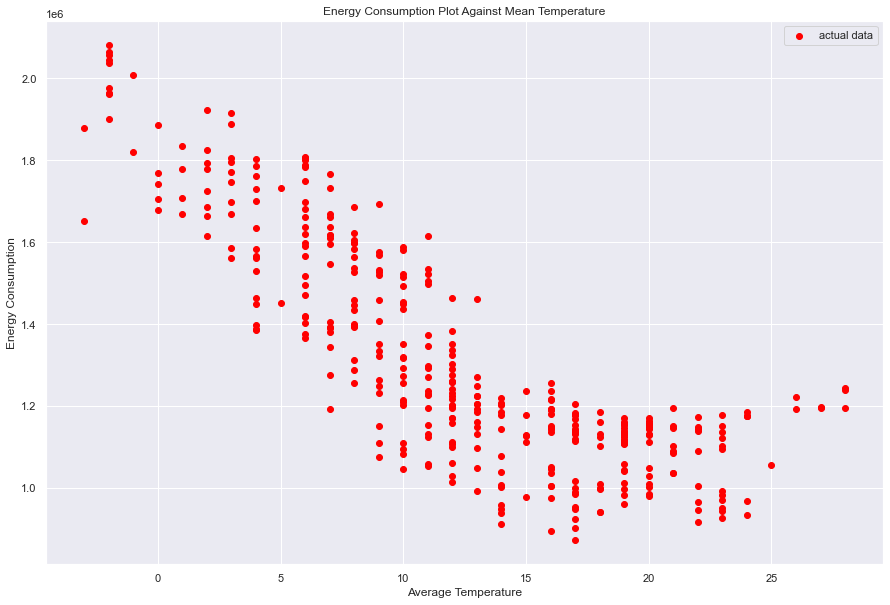

In [7]:
#Scatter plot of energy consumption against mean temperature

plt.title('Energy Consumption Plot Against Mean Temperature') #Plot title

plt.xlabel("Average Temperature") #Horizontal axis label

plt.ylabel('Energy Consumption') #Vertical axis label

xaxis = mergeDatasets["avgTemp"] #selecting average temperature column from the dataframe

yaxis = mergeDatasets["Energie journalière (MWh)"] #selecting Energy Consumption Columns into a dataframe

plt.scatter(xaxis, yaxis, color='red', label='actual data') #plot scatter of energy consumption against average  temperature

plt.legend() #show lengend

plt.show() #Show the scatter plot

# Question 5 (Quadratic Fit)

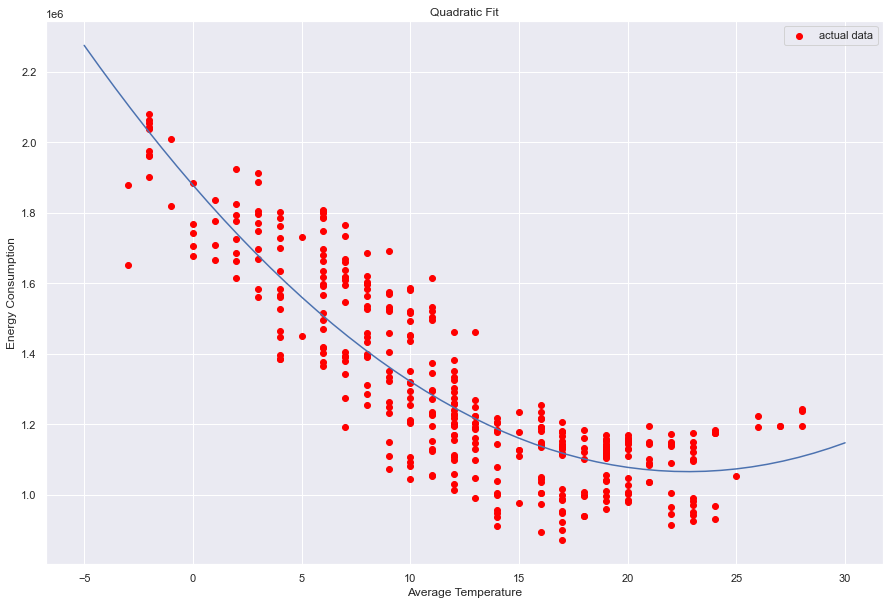

In [8]:
import numpy as np

#polynomial fit with degree = 2 (Quadratic)

model = np.poly1d(np.polyfit(xaxis, yaxis, 2)) #Creating a quadratic model

#add fitted polynomial line to scatterplot
plt.title('Quadratic Fit') #Plot title

plt.xlabel("Average Temperature")    #horizontal axis label

plt.ylabel('Energy Consumption')     #vertical axis label

polyline = np.linspace(-5, 30, 50)   #line space for the plot

plt.scatter(xaxis, yaxis, color='red', label='actual data')  #make a scatter plot

plt.plot(polyline, model(polyline)) #plot the best line of fit

plt.legend() #show the what a label means

plt.show() #show the plot

# Question 6 (Optimal minimum)

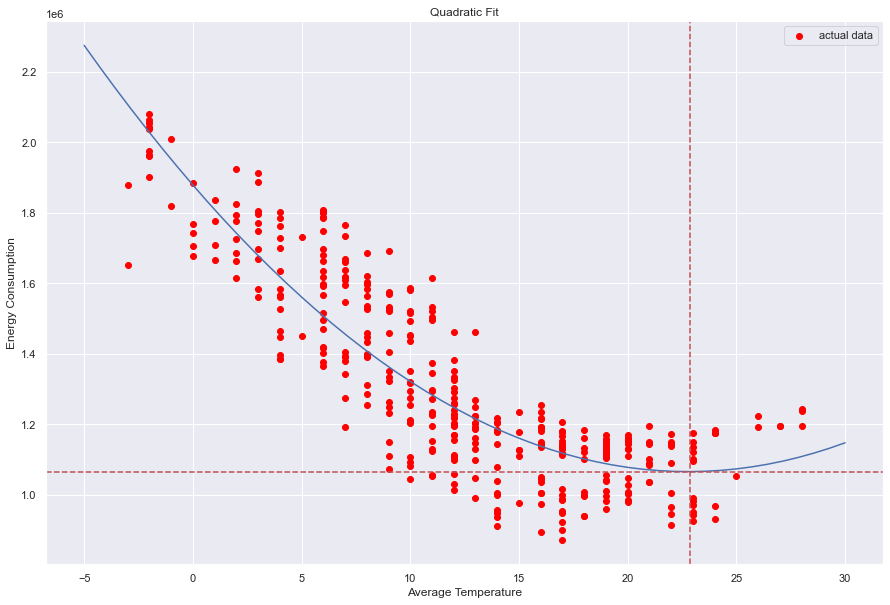

In [9]:
import numpy as np

#polynomial fit with degree = 2 (Quadratic)

model = np.poly1d(np.polyfit(xaxis, yaxis, 2)) #Creating a quadratic model

#add fitted polynomial line to scatterplot

plt.title('Quadratic Fit') #Plot title

plt.xlabel("Average Temperature")    #horizontal axis label

plt.ylabel('Energy Consumption')     #vertical axis label

polyline = np.linspace(-5, 30, 50)   #line space for the plot

plt.scatter(xaxis, yaxis, color='red', label='actual data')  #make a scatter plot

plt.plot(polyline, model(polyline)) #plot the best line of fit

plt.axvline(x=22.857143, color='r', linestyle='--') #Plotting a vertical line to show optimal point 

plt.axhline(y=1065875.8524149277, color='r', linestyle='--') #plotting horizontal line to show optimal point 

plt.legend() #show the what a label means

plt.show() #show the plot



# Question 7 (Multivariate Linear Regression)

In [10]:
#Forward regression function provided from DIAML class to help create model

def forward_regression(X, y, threshold_in, verbose=False):
    initial_list = [] 
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            print(model.summary())
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included


In [11]:

xaxis = mergeDatasets[['highTemp', 'avgTemp', 'lowTemp', 'highDewPoint', 'avgDewPoint',
       'lowDewPoint', 'highHumidity', 'avgHumidity', 'lowHumidity',
       'highSeaLevelPress', 'avgSeaLevelPress', 'lowSeaLevelPress',
       'highVisibility', 'avgVisibility', 'lowVisibility', 'highWind',
       'avgWind', 'sumPrecip']] #Selecting the weather variables into a dataframe

yaxis = mergeDatasets["Energie journalière (MWh)"] #Selecting the energy consupmtion into a dataframe

selectedVariables = forward_regression(xaxis, yaxis, 0.05) #Calling the forward regression function created in the previous cell


                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.594
Model:                                   OLS   Adj. R-squared:                  0.593
Method:                        Least Squares   F-statistic:                     531.1
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           4.78e-73
Time:                               21:36:54   Log-Likelihood:                -4929.1
No. Observations:                        365   AIC:                             9862.
Df Residuals:                            363   BIC:                             9870.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.688
Model:                                   OLS   Adj. R-squared:                  0.687
Method:                        Least Squares   F-statistic:                     399.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           2.25e-92
Time:                               21:36:54   Log-Likelihood:                -4880.9
No. Observations:                        365   AIC:                             9768.
Df Residuals:                            362   BIC:                             9779.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t     

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.712
Model:                                   OLS   Adj. R-squared:                  0.709
Method:                        Least Squares   F-statistic:                     296.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           4.29e-97
Time:                               21:36:54   Log-Likelihood:                -4866.7
No. Observations:                        365   AIC:                             9741.
Df Residuals:                            361   BIC:                             9757.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.721
Model:                                   OLS   Adj. R-squared:                  0.718
Method:                        Least Squares   F-statistic:                     233.0
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           1.68e-98
Time:                               21:36:55   Log-Likelihood:                -4860.4
No. Observations:                        365   AIC:                             9731.
Df Residuals:                            360   BIC:                             9750.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.739
Model:                                   OLS   Adj. R-squared:                  0.734
Method:                        Least Squares   F-statistic:                     168.7
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          4.09e-101
Time:                               21:36:55   Log-Likelihood:                -4848.7
No. Observations:                        365   AIC:                             9711.
Df Residuals:                            358   BIC:                             9739.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.746
Model:                                   OLS   Adj. R-squared:                  0.741
Method:                        Least Squares   F-statistic:                     149.6
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          4.37e-102
Time:                               21:36:55   Log-Likelihood:                -4843.7
No. Observations:                        365   AIC:                             9703.
Df Residuals:                            357   BIC:                             9735.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [12]:
print(selectedVariables) #Printing the variables selected by the forward regression function

['highTemp', 'highVisibility', 'highHumidity', 'avgTemp', 'lowHumidity', 'avgDewPoint', 'lowSeaLevelPress']


In [13]:
#Calculating the adjusted Rsquared value (Coefficient of determination)

x_selected = mergeDatasets[['highTemp', 'highVisibility', 'highHumidity', 'avgTemp', 'lowHumidity', 'avgDewPoint', 'lowSeaLevelPress']] #selecting the variables selected by the model into a dataframe

X = sm.add_constant(x_selected) #using the statsmodel library to add constant(column of one array) to the variable selected

model = sm.OLS(yaxis, X).fit() #Fitting the independent and dependent variable using OLS from statmodel library

#display adjusted R-squared
print(f'The coefficient of determination is:{model.rsquared}') #Printing the RSquared value


The coefficient of determination is:0.7506437341112866


# Question 8 (Increase Number of Explanatory Variable)

In [14]:
yaxis = mergeDatasets["Energie journalière (MWh)"] #Selecting the energy consumption column from the merge dataframe

weatherUnsquared = mergeDatasets[['highTemp', 'avgTemp', 'lowTemp', 'highDewPoint', 'avgDewPoint',
       'lowDewPoint', 'highHumidity', 'avgHumidity', 'lowHumidity',
       'highSeaLevelPress', 'avgSeaLevelPress', 'lowSeaLevelPress',
       'highVisibility', 'avgVisibility', 'lowVisibility', 'highWind',
       'avgWind', 'sumPrecip']] #Selecting all the columns in the weather dataframe

weatherSquared = np.square(weatherUnsquared) #Squaring all the columns/variables in the weather dataframe using  numpy square function

mrgeWeatherSquaredUnsquared = pd.merge(weatherUnsquared, weatherSquared, on='Date') #Merging both the squared and unsquared weather columns into a dataframe

mrgeWeatherSquaredUnsquared #Showing the dataframe


,highTemp_x,avgTemp_x,lowTemp_x,highDewPoint_x,avgDewPoint_x,lowDewPoint_x,highHumidity_x,avgHumidity_x,lowHumidity_x,highSeaLevelPress_x,...,lowHumidity_y,highSeaLevelPress_y,avgSeaLevelPress_y,lowSeaLevelPress_y,highVisibility_y,avgVisibility_y,lowVisibility_y,highWind_y,avgWind_y,sumPrecip_y
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,...,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,...,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,...,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,...,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,...,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,...,3600,996004,974169,964324,961.0,144.0,36.0,1521,576,16
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,...,3249,1022121,1010025,998001,961.0,256.0,100.0,361,169,0
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,...,2916,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144


In [15]:
newModel = forward_regression(mrgeWeatherSquaredUnsquared, yaxis, 0.05) #Calling the forward regression function on the newly merged dataframe

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.065
Model:                                   OLS   Adj. R-squared:                  0.062
Method:                        Least Squares   F-statistic:                     25.18
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           8.19e-07
Time:                               21:36:55   Log-Likelihood:                -5081.4
No. Observations:                        365   AIC:                         1.017e+04
Df Residuals:                            363   BIC:                         1.017e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.024
Model:                                   OLS   Adj. R-squared:                  0.021
Method:                        Least Squares   F-statistic:                     8.849
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):            0.00313
Time:                               21:36:55   Log-Likelihood:                -5089.2
No. Observations:                        365   AIC:                         1.018e+04
Df Residuals:                            363   BIC:                         1.019e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.114
Model:                                   OLS   Adj. R-squared:                  0.111
Method:                        Least Squares   F-statistic:                     46.51
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           3.82e-11
Time:                               21:36:55   Log-Likelihood:                -5071.6
No. Observations:                        365   AIC:                         1.015e+04
Df Residuals:                            363   BIC:                         1.016e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.687
Model:                                   OLS   Adj. R-squared:                  0.686
Method:                        Least Squares   F-statistic:                     397.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           4.02e-92
Time:                               21:36:56   Log-Likelihood:                -4881.5
No. Observations:                        365   AIC:                             9769.
Df Residuals:                            362   BIC:                             9781.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.691
Model:                                   OLS   Adj. R-squared:                  0.690
Method:                        Least Squares   F-statistic:                     405.5
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           3.82e-93
Time:                               21:36:56   Log-Likelihood:                -4879.1
No. Observations:                        365   AIC:                             9764.
Df Residuals:                            362   BIC:                             9776.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.710
Model:                                   OLS   Adj. R-squared:                  0.708
Method:                        Least Squares   F-statistic:                     442.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           5.41e-98
Time:                               21:36:56   Log-Likelihood:                -4867.8
No. Observations:                        365   AIC:                             9742.
Df Residuals:                            362   BIC:                             9753.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.687
Model:                                   OLS   Adj. R-squared:                  0.685
Method:                        Least Squares   F-statistic:                     397.5
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           4.53e-92
Time:                               21:36:56   Log-Likelihood:                -4881.6
No. Observations:                        365   AIC:                             9769.
Df Residuals:                            362   BIC:                             9781.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.688
Model:                                   OLS   Adj. R-squared:                  0.687
Method:                        Least Squares   F-statistic:                     399.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           2.25e-92
Time:                               21:36:56   Log-Likelihood:                -4880.9
No. Observations:                        365   AIC:                             9768.
Df Residuals:                            362   BIC:                             9779.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

strong multicollinearity or other numerical problems.
                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.797
Method:                        Least Squares   F-statistic:                     477.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          3.21e-125
Time:                               21:36:56   Log-Likelihood:                -4801.2
No. Observations:                        365   AIC:                             9610.
Df Residuals:                            361   BIC:                             9626.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.798
Method:                        Least Squares   F-statistic:                     479.0
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.90e-125
Time:                               21:36:56   Log-Likelihood:                -4800.6
No. Observations:                        365   AIC:                             9609.
Df Residuals:                            361   BIC:                             9625.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.797
Method:                        Least Squares   F-statistic:                     477.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          2.68e-125
Time:                               21:36:56   Log-Likelihood:                -4801.0
No. Observations:                        365   AIC:                             9610.
Df Residuals:                            361   BIC:                             9626.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.797
Method:                        Least Squares   F-statistic:                     477.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          3.19e-125
Time:                               21:36:56   Log-Likelihood:                -4801.2
No. Observations:                        365   AIC:                             9610.
Df Residuals:                            361   BIC:                             9626.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

strong multicollinearity or other numerical problems.
                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.803
Model:                                   OLS   Adj. R-squared:                  0.801
Method:                        Least Squares   F-statistic:                     366.5
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.68e-125
Time:                               21:36:56   Log-Likelihood:                -4797.3
No. Observations:                        365   AIC:                             9605.
Df Residuals:                            360   BIC:                             9624.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.802
Model:                                   OLS   Adj. R-squared:                  0.800
Method:                        Least Squares   F-statistic:                     364.7
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          3.41e-125
Time:                               21:36:56   Log-Likelihood:                -4798.0
No. Observations:                        365   AIC:                             9606.
Df Residuals:                            360   BIC:                             9626.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.801
Model:                                   OLS   Adj. R-squared:                  0.799
Method:                        Least Squares   F-statistic:                     363.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          6.23e-125
Time:                               21:36:56   Log-Likelihood:                -4798.6
No. Observations:                        365   AIC:                             9607.
Df Residuals:                            360   BIC:                             9627.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.801
Model:                                   OLS   Adj. R-squared:                  0.799
Method:                        Least Squares   F-statistic:                     362.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          6.87e-125
Time:                               21:36:56   Log-Likelihood:                -4798.7
No. Observations:                        365   AIC:                             9607.
Df Residuals:                            360   BIC:                             9627.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.801
Model:                                   OLS   Adj. R-squared:                  0.799
Method:                        Least Squares   F-statistic:                     362.7
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.44e-125
Time:                               21:36:56   Log-Likelihood:                -4798.8
No. Observations:                        365   AIC:                             9608.
Df Residuals:                            360   BIC:                             9627.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.807
Model:                                   OLS   Adj. R-squared:                  0.804
Method:                        Least Squares   F-statistic:                     300.1
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          8.16e-126
Time:                               21:36:56   Log-Likelihood:                -4793.5
No. Observations:                        365   AIC:                             9599.
Df Residuals:                            359   BIC:                             9622.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.807
Model:                                   OLS   Adj. R-squared:                  0.804
Method:                        Least Squares   F-statistic:                     299.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          8.92e-126
Time:                               21:36:56   Log-Likelihood:                -4793.6
No. Observations:                        365   AIC:                             9599.
Df Residuals:                            359   BIC:                             9623.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.807
Model:                                   OLS   Adj. R-squared:                  0.805
Method:                        Least Squares   F-statistic:                     301.0
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          5.20e-126
Time:                               21:36:57   Log-Likelihood:                -4793.0
No. Observations:                        365   AIC:                             9598.
Df Residuals:                            359   BIC:                             9621.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.807
Model:                                   OLS   Adj. R-squared:                  0.805
Method:                        Least Squares   F-statistic:                     300.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          5.51e-126
Time:                               21:36:57   Log-Likelihood:                -4793.1
No. Observations:                        365   AIC:                             9598.
Df Residuals:                            359   BIC:                             9622.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.807
Model:                                   OLS   Adj. R-squared:                  0.804
Method:                        Least Squares   F-statistic:                     300.3
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.25e-126
Time:                               21:36:57   Log-Likelihood:                -4793.4
No. Observations:                        365   AIC:                             9599.
Df Residuals:                            359   BIC:                             9622.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.808
Model:                                   OLS   Adj. R-squared:                  0.805
Method:                        Least Squares   F-statistic:                     301.5
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          4.12e-126
Time:                               21:36:57   Log-Likelihood:                -4792.8
No. Observations:                        365   AIC:                             9598.
Df Residuals:                            359   BIC:                             9621.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [16]:
print(newModel) #Printing the selected weather variables from the new model

['highTemp_x', 'highTemp_y', 'highVisibility_y', 'highVisibility_x']


In [17]:
#Calculating the Rsquared or coefficient of determination using the new model containing squared data

x_selected = mrgeWeatherSquaredUnsquared[['highTemp_x', 'highTemp_y', 'highVisibility_y', 'highVisibility_x']] #Using the selected variable by the model to find the coefficient of determination

X = sm.add_constant(x_selected) #using the statsmodel library to add constant(column of one array) to the variable selected

model = sm.OLS(yaxis, X).fit() #fitting the model

#display adjusted R-squared
print(f'The coefficient of determination (r2) of the new model is:{model.rsquared}')#print the value of the coefficient of determination


The coefficient of determination (r2) of the new model is:0.8068265031072407


# Question 9 (Considering day of the Week)

In [18]:
#Considering day of the week for the model

mrgeWeatherSquaredUnsquared["dayOfWeek"] = mrgeWeatherSquaredUnsquared.index.strftime('%A') #Adding column day of the week to the dataframe using strftime function 

mrgeWeatherSquaredUnsquared #Showing the dataframe with the column added

,highTemp_x,avgTemp_x,lowTemp_x,highDewPoint_x,avgDewPoint_x,lowDewPoint_x,highHumidity_x,avgHumidity_x,lowHumidity_x,highSeaLevelPress_x,...,highSeaLevelPress_y,avgSeaLevelPress_y,lowSeaLevelPress_y,highVisibility_y,avgVisibility_y,lowVisibility_y,highWind_y,avgWind_y,sumPrecip_y,dayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,...,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0,Sunday
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,...,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4,Monday
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,...,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0,Tuesday
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,...,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4,Wednesday
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,...,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,...,996004,974169,964324,961.0,144.0,36.0,1521,576,16,Wednesday
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,...,1022121,1010025,998001,961.0,256.0,100.0,361,169,0,Thursday
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,...,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144,Friday


In [19]:
getDummiesDay = pd.get_dummies(mrgeWeatherSquaredUnsquared["dayOfWeek"]) #Creating a dummy data for the data for the week 

getDummiesDay #showing the dummy data

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,
2017-01-01,0,0,0,1,0,0,0
2017-01-02,0,1,0,0,0,0,0
2017-01-03,0,0,0,0,0,1,0
2017-01-04,0,0,0,0,0,0,1
2017-01-05,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
2017-12-27,0,0,0,0,0,0,1
2017-12-28,0,0,0,0,1,0,0
2017-12-29,1,0,0,0,0,0,0


In [20]:
newDataModel = pd.merge(mrgeWeatherSquaredUnsquared, getDummiesDay, on='Date') #Merging the dummy data for day of the week with the newModel dataframe

newDataModelDrop = newDataModel.drop("dayOfWeek", axis=1) #Dropping the day of the week column because it is categorical data which is not needed in the model

newDataModelDrop #Showing the merged dataframe

,highTemp_x,avgTemp_x,lowTemp_x,highDewPoint_x,avgDewPoint_x,lowDewPoint_x,highHumidity_x,avgHumidity_x,lowHumidity_x,highSeaLevelPress_x,...,highWind_y,avgWind_y,sumPrecip_y,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,...,100,36,0,0,0,0,1,0,0,0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,...,256,36,4,0,1,0,0,0,0,0
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,...,196,36,0,0,0,0,0,0,1,0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,...,529,196,4,0,0,0,0,0,0,1
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,...,196,121,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,...,1521,576,16,0,0,0,0,0,0,1
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,...,361,169,0,0,0,0,0,1,0,0
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,...,1024,169,144,1,0,0,0,0,0,0


In [21]:

daysOfWeekSelected = forward_regression(newDataModelDrop, yaxis, 0.05) #Calling the forward regression function on the new dataframe containing dummy data for day of the week


                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.065
Model:                                   OLS   Adj. R-squared:                  0.062
Method:                        Least Squares   F-statistic:                     25.18
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           8.19e-07
Time:                               21:36:57   Log-Likelihood:                -5081.4
No. Observations:                        365   AIC:                         1.017e+04
Df Residuals:                            363   BIC:                         1.017e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.007
Model:                                   OLS   Adj. R-squared:                  0.004
Method:                        Least Squares   F-statistic:                     2.425
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):              0.120
Time:                               21:36:57   Log-Likelihood:                -5092.4
No. Observations:                        365   AIC:                         1.019e+04
Df Residuals:                            363   BIC:                         1.020e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.017
Model:                                   OLS   Adj. R-squared:                  0.014
Method:                        Least Squares   F-statistic:                     6.225
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):             0.0130
Time:                               21:36:57   Log-Likelihood:                -5090.5
No. Observations:                        365   AIC:                         1.019e+04
Df Residuals:                            363   BIC:                         1.019e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.563
Model:                                   OLS   Adj. R-squared:                  0.562
Method:                        Least Squares   F-statistic:                     467.1
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           3.50e-67
Time:                               21:36:57   Log-Likelihood:                -4942.7
No. Observations:                        365   AIC:                             9889.
Df Residuals:                            363   BIC:                             9897.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.003
Method:                        Least Squares   F-statistic:                   0.01481
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):              0.903
Time:                               21:36:57   Log-Likelihood:                -5093.6
No. Observations:                        365   AIC:                         1.019e+04
Df Residuals:                            363   BIC:                         1.020e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.693
Model:                                   OLS   Adj. R-squared:                  0.691
Method:                        Least Squares   F-statistic:                     408.1
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           1.73e-93
Time:                               21:36:57   Log-Likelihood:                -4878.3
No. Observations:                        365   AIC:                             9763.
Df Residuals:                            362   BIC:                             9774.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.688
Model:                                   OLS   Adj. R-squared:                  0.687
Method:                        Least Squares   F-statistic:                     399.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           2.17e-92
Time:                               21:36:58   Log-Likelihood:                -4880.8
No. Observations:                        365   AIC:                             9768.
Df Residuals:                            362   BIC:                             9779.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.687
Model:                                   OLS   Adj. R-squared:                  0.685
Method:                        Least Squares   F-statistic:                     397.0
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           5.35e-92
Time:                               21:36:58   Log-Likelihood:                -4881.7
No. Observations:                        365   AIC:                             9769.
Df Residuals:                            362   BIC:                             9781.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.687
Model:                                   OLS   Adj. R-squared:                  0.685
Method:                        Least Squares   F-statistic:                     396.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):           5.80e-92
Time:                               21:36:58   Log-Likelihood:                -4881.8
No. Observations:                        365   AIC:                             9770.
Df Residuals:                            362   BIC:                             9781.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.797
Method:                        Least Squares   F-statistic:                     478.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          2.36e-125
Time:                               21:36:58   Log-Likelihood:                -4800.9
No. Observations:                        365   AIC:                             9610.
Df Residuals:                            361   BIC:                             9625.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.797
Method:                        Least Squares   F-statistic:                     477.3
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          3.18e-125
Time:                               21:36:58   Log-Likelihood:                -4801.2
No. Observations:                        365   AIC:                             9610.
Df Residuals:                            361   BIC:                             9626.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.798
Method:                        Least Squares   F-statistic:                     479.0
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.90e-125
Time:                               21:36:58   Log-Likelihood:                -4800.6
No. Observations:                        365   AIC:                             9609.
Df Residuals:                            361   BIC:                             9625.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.797
Method:                        Least Squares   F-statistic:                     477.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          3.24e-125
Time:                               21:36:58   Log-Likelihood:                -4801.2
No. Observations:                        365   AIC:                             9610.
Df Residuals:                            361   BIC:                             9626.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.799
Model:                                   OLS   Adj. R-squared:                  0.798
Method:                        Least Squares   F-statistic:                     478.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.94e-125
Time:                               21:36:58   Log-Likelihood:                -4800.7
No. Observations:                        365   AIC:                             9609.
Df Residuals:                            361   BIC:                             9625.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.837
Model:                                   OLS   Adj. R-squared:                  0.835
Method:                        Least Squares   F-statistic:                     463.0
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.81e-140
Time:                               21:36:58   Log-Likelihood:                -4762.3
No. Observations:                        365   AIC:                             9535.
Df Residuals:                            360   BIC:                             9554.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.839
Model:                                   OLS   Adj. R-squared:                  0.837
Method:                        Least Squares   F-statistic:                     468.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          3.31e-141
Time:                               21:36:58   Log-Likelihood:                -4760.6
No. Observations:                        365   AIC:                             9531.
Df Residuals:                            360   BIC:                             9551.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.842
Model:                                   OLS   Adj. R-squared:                  0.840
Method:                        Least Squares   F-statistic:                     478.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.09e-142
Time:                               21:36:59   Log-Likelihood:                -4757.1
No. Observations:                        365   AIC:                             9524.
Df Residuals:                            360   BIC:                             9544.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.838
Model:                                   OLS   Adj. R-squared:                  0.836
Method:                        Least Squares   F-statistic:                     465.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          8.91e-141
Time:                               21:36:59   Log-Likelihood:                -4761.6
No. Observations:                        365   AIC:                             9533.
Df Residuals:                            360   BIC:                             9553.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.838
Model:                                   OLS   Adj. R-squared:                  0.836
Method:                        Least Squares   F-statistic:                     466.0
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          6.70e-141
Time:                               21:36:59   Log-Likelihood:                -4761.3
No. Observations:                        365   AIC:                             9533.
Df Residuals:                            360   BIC:                             9552.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.872
Model:                                   OLS   Adj. R-squared:                  0.870
Method:                        Least Squares   F-statistic:                     487.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.25e-157
Time:                               21:36:59   Log-Likelihood:                -4718.9
No. Observations:                        365   AIC:                             9450.
Df Residuals:                            359   BIC:                             9473.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.870
Model:                                   OLS   Adj. R-squared:                  0.868
Method:                        Least Squares   F-statistic:                     478.6
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          2.49e-156
Time:                               21:36:59   Log-Likelihood:                -4721.9
No. Observations:                        365   AIC:                             9456.
Df Residuals:                            359   BIC:                             9479.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.870
Model:                                   OLS   Adj. R-squared:                  0.868
Method:                        Least Squares   F-statistic:                     479.6
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.80e-156
Time:                               21:36:59   Log-Likelihood:                -4721.6
No. Observations:                        365   AIC:                             9455.
Df Residuals:                            359   BIC:                             9479.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.870
Model:                                   OLS   Adj. R-squared:                  0.868
Method:                        Least Squares   F-statistic:                     478.7
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          2.36e-156
Time:                               21:36:59   Log-Likelihood:                -4721.9
No. Observations:                        365   AIC:                             9456.
Df Residuals:                            359   BIC:                             9479.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.876
Model:                                   OLS   Adj. R-squared:                  0.873
Method:                        Least Squares   F-statistic:                     419.6
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.35e-158
Time:                               21:36:59   Log-Likelihood:                -4713.4
No. Observations:                        365   AIC:                             9441.
Df Residuals:                            358   BIC:                             9468.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.878
Model:                                   OLS   Adj. R-squared:                  0.875
Method:                        Least Squares   F-statistic:                     427.5
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.25e-160
Time:                               21:37:00   Log-Likelihood:                -4710.4
No. Observations:                        365   AIC:                             9435.
Df Residuals:                            358   BIC:                             9462.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.876
Model:                                   OLS   Adj. R-squared:                  0.874
Method:                        Least Squares   F-statistic:                     421.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          5.96e-159
Time:                               21:37:00   Log-Likelihood:                -4712.6
No. Observations:                        365   AIC:                             9439.
Df Residuals:                            358   BIC:                             9466.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.884
Model:                                   OLS   Adj. R-squared:                  0.881
Method:                        Least Squares   F-statistic:                     387.3
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.71e-162
Time:                               21:37:00   Log-Likelihood:                -4701.1
No. Observations:                        365   AIC:                             9418.
Df Residuals:                            357   BIC:                             9449.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.883
Model:                                   OLS   Adj. R-squared:                  0.880
Method:                        Least Squares   F-statistic:                     383.6
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.75e-162
Time:                               21:37:00   Log-Likelihood:                -4702.6
No. Observations:                        365   AIC:                             9421.
Df Residuals:                            357   BIC:                             9452.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.887
Model:                                   OLS   Adj. R-squared:                  0.884
Method:                        Least Squares   F-statistic:                     348.3
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          3.00e-163
Time:                               21:37:01   Log-Likelihood:                -4696.2
No. Observations:                        365   AIC:                             9410.
Df Residuals:                            356   BIC:                             9445.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.887
Model:                                   OLS   Adj. R-squared:                  0.885
Method:                        Least Squares   F-statistic:                     350.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          9.12e-164
Time:                               21:37:01   Log-Likelihood:                -4695.0
No. Observations:                        365   AIC:                             9408.
Df Residuals:                            356   BIC:                             9443.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.887
Model:                                   OLS   Adj. R-squared:                  0.884
Method:                        Least Squares   F-statistic:                     348.4
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          2.90e-163
Time:                               21:37:01   Log-Likelihood:                -4696.2
No. Observations:                        365   AIC:                             9410.
Df Residuals:                            356   BIC:                             9445.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.891
Model:                                   OLS   Adj. R-squared:                  0.888
Method:                        Least Squares   F-statistic:                     322.4
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          6.18e-165
Time:                               21:37:01   Log-Likelihood:                -4689.1
No. Observations:                        365   AIC:                             9398.
Df Residuals:                            355   BIC:                             9437.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.890
Model:                                   OLS   Adj. R-squared:                  0.887
Method:                        Least Squares   F-statistic:                     317.7
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          6.25e-164
Time:                               21:37:01   Log-Likelihood:                -4691.5
No. Observations:                        365   AIC:                             9403.
Df Residuals:                            355   BIC:                             9442.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.889
Model:                                   OLS   Adj. R-squared:                  0.887
Method:                        Least Squares   F-statistic:                     316.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          9.45e-164
Time:                               21:37:02   Log-Likelihood:                -4692.0
No. Observations:                        365   AIC:                             9404.
Df Residuals:                            355   BIC:                             9443.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.889
Model:                                   OLS   Adj. R-squared:                  0.887
Method:                        Least Squares   F-statistic:                     317.3
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.75e-164
Time:                               21:37:02   Log-Likelihood:                -4691.7
No. Observations:                        365   AIC:                             9403.
Df Residuals:                            355   BIC:                             9442.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.891
Model:                                   OLS   Adj. R-squared:                  0.888
Method:                        Least Squares   F-statistic:                     290.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.17e-164
Time:                               21:37:02   Log-Likelihood:                -4688.7
No. Observations:                        365   AIC:                             9399.
Df Residuals:                            354   BIC:                             9442.
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.892
Model:                                   OLS   Adj. R-squared:                  0.888
Method:                        Least Squares   F-statistic:                     290.9
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          4.95e-164
Time:                               21:37:02   Log-Likelihood:                -4688.3
No. Observations:                        365   AIC:                             9399.
Df Residuals:                            354   BIC:                             9441.
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.892
Model:                                   OLS   Adj. R-squared:                  0.889
Method:                        Least Squares   F-statistic:                     293.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.08e-164
Time:                               21:37:02   Log-Likelihood:                -4686.7
No. Observations:                        365   AIC:                             9395.
Df Residuals:                            354   BIC:                             9438.
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.891
Model:                                   OLS   Adj. R-squared:                  0.888
Method:                        Least Squares   F-statistic:                     290.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.33e-164
Time:                               21:37:02   Log-Likelihood:                -4688.7
No. Observations:                        365   AIC:                             9399.
Df Residuals:                            354   BIC:                             9442.
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.891
Model:                                   OLS   Adj. R-squared:                  0.888
Method:                        Least Squares   F-statistic:                     290.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.21e-164
Time:                               21:37:02   Log-Likelihood:                -4688.7
No. Observations:                        365   AIC:                             9399.
Df Residuals:                            354   BIC:                             9442.
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.893
Model:                                   OLS   Adj. R-squared:                  0.889
Method:                        Least Squares   F-statistic:                     267.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.09e-163
Time:                               21:37:02   Log-Likelihood:                -4686.1
No. Observations:                        365   AIC:                             9396.
Df Residuals:                            353   BIC:                             9443.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.893
Model:                                   OLS   Adj. R-squared:                  0.890
Method:                        Least Squares   F-statistic:                     267.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.62e-164
Time:                               21:37:02   Log-Likelihood:                -4685.8
No. Observations:                        365   AIC:                             9396.
Df Residuals:                            353   BIC:                             9442.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.893
Model:                                   OLS   Adj. R-squared:                  0.890
Method:                        Least Squares   F-statistic:                     268.2
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          6.18e-164
Time:                               21:37:03   Log-Likelihood:                -4685.5
No. Observations:                        365   AIC:                             9395.
Df Residuals:                            353   BIC:                             9442.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.893
Model:                                   OLS   Adj. R-squared:                  0.890
Method:                        Least Squares   F-statistic:                     267.5
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          9.29e-164
Time:                               21:37:03   Log-Likelihood:                -4686.0
No. Observations:                        365   AIC:                             9396.
Df Residuals:                            353   BIC:                             9443.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.895
Model:                                   OLS   Adj. R-squared:                  0.891
Method:                        Least Squares   F-statistic:                     248.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          1.04e-163
Time:                               21:37:03   Log-Likelihood:                -4683.1
No. Observations:                        365   AIC:                             9392.
Df Residuals:                            352   BIC:                             9443.
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.895
Model:                                   OLS   Adj. R-squared:                  0.891
Method:                        Least Squares   F-statistic:                     249.7
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          5.98e-164
Time:                               21:37:03   Log-Likelihood:                -4682.6
No. Observations:                        365   AIC:                             9391.
Df Residuals:                            352   BIC:                             9442.
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.895
Model:                                   OLS   Adj. R-squared:                  0.891
Method:                        Least Squares   F-statistic:                     249.0
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          9.25e-164
Time:                               21:37:03   Log-Likelihood:                -4683.0
No. Observations:                        365   AIC:                             9392.
Df Residuals:                            352   BIC:                             9443.
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [22]:

print(daysOfWeekSelected) #Printing the selected variables by the model


['highTemp_x', 'highTemp_y', 'Sunday', 'Saturday', 'avgTemp_x', 'lowHumidity_x', 'highWind_y', 'Monday', 'sumPrecip_x', 'avgTemp_y', 'highDewPoint_y']


In [23]:

x_selected = newDataModelDrop[['highTemp_x', 'highTemp_y', 'Sunday', 'Saturday', 'avgTemp_x', 'lowHumidity_x', 'highWind_y', 'Monday', 'sumPrecip_x', 'avgTemp_y', 'highDewPoint_y']] #Using the selected variables to calculate coefficient of determination

X = sm.add_constant(x_selected) #using the statsmodel library to add constant(column of one array) to the variable selected

model = sm.OLS(yaxis, X).fit() #Fitting the model

#display adjusted R-squared

print(f'The coefficient of determination (r2) of the new model is:{model.rsquared}') #Printing the value of the Rsquared obtained using the new dataframe or model


The coefficient of determination (r2) of the new model is:0.8945057843312311
